Christopher White

Professor Filatova

CST 3512

11 November 2021

# Spotify project - 'Wrapped' Replica


> I want to create a summary of the Spotify listening history of my friends, similar to Spotify's yearly 'Wrapped' feature which shows users their year on the platform, including their favorite artists, tracks, playlists, genres... I have gotten my friends' approval and have had them request their past year listening history data from Spotify (pending receipt, should take a week). The data will come in json form.

---


  Pre-reqs:   
* Collect json files from friends on their year long Spotify listening history
* Add json file to github repo to use curl command to put into local storage in notebook
* Authenticate Spotify API to query top songs/artists for audio features (for plotting) and country code (for geo analysis)
* Create data frames for each friends' listening history



---

# Objectives:
* Find top 10 songs for each friend by sum playtime (turn ms -> minutes/hrs)
* Find top 10 artist for each friend by sum playtime (turn ms -> minutes/hrs)
* Plot rolling total listening for top songs over year for each friend / plot daily/weekly totals
* Plot rolling total listening for top artist over year for each friend / plot daily/weekly totals
* Plot total top artists amongst friends / total top songs if there is overlap 
* Explore audio features of each friends' top songs:      
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
  * duration_ms (int)
    * "Duration of the track in milliseconds". Will use this to calculate how many times a track was listened to (in a day/week) by dividing msPlayed from original json by this duration
  * danceability (float, 0.0 - 1.0)
    * "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
  * energy (float, 0.0 - 1.0)
    * "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."
  * speechiness (float)
    * "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."
  * valence (float, 0.0 - 1.0)
    * "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

* Plot 'available_market' country code of each friend's top tracks on world map
  * Create markers for each song on map (will contain track information)
  * Colorcode marker by friend
* Plot artist birth place for each top artist on world map


number of different distinct artists listened to over time/per week. 







# Process:     
Dataframe manipulation:   
* Read json files into separate dataframes
* Find top 10 highest sum(playtime) group by song for each friend => into list for querying Spotify API
* Find top 10 highest sum(playtime) group by artist for each friend => into list
* Find intersection of dataframes to look at group top stats

Spotify API:    
https://developer.spotify.com/documentation/web-api/reference/#/operations/search
* Query list of top song names for each friend, using the artist filter to get specific results. obtain spotify URI / ID for track details, country code, genre
* Query audio features given list of top songs
* Create new columns in dataframes with audio features and country code

Geopandas / Folium:    
* Get dataframe to plot the world map
* Specify starting scale
* Specify appearance

---

# Visualizing:     
Pivot tables/Histogram:
* Show top 10 artists by playtime (sum playtime, sort descending, limit 10)
* Show top 10 songs by playtime

Time series Plots:    
* Top 5/10 artists playtime over the course of the year
* Top songs playtime over the course of the year

Scatterplot:    
* Show audio features of the top songs (i.e. the cereal plot with color indicating another attribute in addition to x-y)

Geo Analysis:
* Plot marker on country where the country code == country name    
* Create markers for each top song
  * Color - correspond to friend
  * Track name
  * Artist
  * Release data
  * Total listening time



In [19]:
!pip3 install requests

In [12]:
import pandas as pd # Import pandas library
import numpy as np # Import numpy library
import os # Import os library

In [50]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Change the size of figure drawn
rcParams['figure.figsize'] = (16, 6)

plt.rcParams['axes.facecolor'] = 'navy'

In [11]:
# Clone streaming history data repository into local directory
!git clone https://github.com/ChrisWhit3/spotify-vision.git

fatal: destination path 'spotify-vision' already exists and is not an empty directory.


# P1 Listening History Analysis

In [29]:
'''

  Function takes the path to the folder containing the streaming history files and creates streaming history dataframe for each person

  Takes directory path from total sorted list
  Get person number in the form of the string 'Streaming History#_#.json'
  Create dictionary with key id and dataframe
  
'''

def create_dataframe_from_streaming_files(directory_path):
  
  if os.path.isdir(directory_path):
    if len(os.listdir(directory_path)) != 0:
      #print(sorted(os.listdir(directory_path)))
      num_person_files = {}
      for file in sorted(os.listdir(directory_path)):
        # df_name = file.split("_")
        person = int(file.split("_")[0].split('y',1)[1])
        #print(person)
        if person in num_person_files:
          num_person_files[person].append(pd.read_json(f'{directory_path}'+file))
        else:
          num_person_files[person] = [(pd.read_json(f'{directory_path}'+file))]

      #print(num_person_files)
      streaming_dataframes = {}
      for k,v in num_person_files.items():
        streaming_dataframes[k] = pd.concat(v)

        streaming_dataframes[k]['endTime']

      return streaming_dataframes
         # print(v[i])
      #    print(f'{directory_path}'+v[i])
          #test = pd.read_json(v[i])
          #test1 = pd.read_json(f'{directory_path}'+v[i])

          #test1
          #name = pd.read_json(v[i])
          #name
      #print(num_person_files)
    
    else:
      return 'directory is empty'

  else:
    return 'no directory at path'

  
  
      
#  for filename in os.listdir(directory):
#    print(sorted(filename))

  

#print(os.path.isdir('spotify-vision/'))

# Apply function to path of streaming history folder
streaming_dataframes = create_dataframe_from_streaming_files('spotify-vision/streaming_history_data/')

In [30]:
print(streaming_dataframes.items())

dict_items([(0,                endTime  ... msPlayed
0     2020-11-30 00:01  ...   205484
1     2020-11-30 00:04  ...   181688
2     2020-11-30 00:37  ...    65837
3     2020-11-30 00:40  ...   181661
4     2020-11-30 00:44  ...   247058
...                ...  ...      ...
1482  2021-11-30 14:20  ...   203288
1483  2021-11-30 15:00  ...  2393508
1484  2021-11-30 15:00  ...    41730
1485  2021-11-30 17:02  ...   565120
1486  2021-11-30 19:12  ...   353850

[11487 rows x 4 columns]), (1,                endTime  ... msPlayed
0     2020-11-07 01:29  ...     6005
1     2020-11-29 22:39  ...   199638
2     2020-11-30 20:19  ...     2670
3     2020-11-30 20:23  ...    12329
4     2020-11-30 20:23  ...   207133
...                ...  ...      ...
2068  2021-11-30 18:35  ...        0
2069  2021-11-30 18:35  ...   176160
2070  2021-11-30 18:36  ...      812
2071  2021-11-30 18:36  ...    45975
2072  2021-11-30 18:39  ...   169552

[22073 rows x 4 columns]), (2,                endTime       art

In [32]:
'''
  Function will convert msPlayed column to secPlayed, minPlayed, and hrPlayed columns

  Takes in dataframe
  Returns dataframe with calculated columns added
  --------------------------------------
'''
def add_ms_conversion_columns(dataframe):
  # Convert miliseconds to seconds and save as new seconds played column
  dataframe['secPlayed'] = dataframe['msPlayed'] / (1000)

  # Convert miliseconds to minutes and save as new minutes played column
  dataframe['minPlayed'] = dataframe['msPlayed'] / (1000 * 60)

  # Convert miliseconds to minutes and save as new minutes played column
  dataframe['hrPlayed'] = dataframe['msPlayed'] / (1000 * 60 * 60)

  return dataframe

In [33]:
'''
  Function will strip all object datatype column values of leading and trailing whitespace
  --------------------------------------
'''
def strip_column_value_whitespace(df):

  # Select columns that have the datatype equal to 'object'
  object_cols = df.select_dtypes(object).columns

  # Apply function to turn array of columns to numeric datatype
  df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

  return df

In [34]:
'''
  For this analysis we would like to only look at tracks

  Function will remove podcast listens

  Based on observed outlier listen times and user input - future analysis will use Spotify API to remove all listens where type is podcast
'''

def remove_podcast_entries(df):
  list_of_podcasts_to_remove = ['The Daily', 'Call Her Daddy', 
                                'Comforting Sounds', 'Crime Junkie', 
                                'Philosophy Bites', 'Pass the Compassion',
                                'Conspiracy Theories', 'Keeping Up With Kayla',
                                'Today in True Crime', 'Good For You',
                                'You\'re Wrong About', 'The Joe Rogan Experience',
                                'Ologies with Alie Ward', 'Hidden Brain',
                                'No Stupid Questions', 'Stuff You Should Know',
                                'Infamous: The Story of YNW Melly', 'Mythology',
                                'The Journal.','MarketFoolery', 'The Big Loop'
                                ]
  df.drop(df[df['artistName'].isin(list_of_podcasts_to_remove)].index, inplace = True)
  
  return df



In [35]:
'''
  Establish a 'Meaningful Listen':

  Getting through a verse and a chorus is enough time to feel out a song
  (although I may argue for a full listen)  

  Remove the listens that are less than 63 seconds (about a third of the average song length)
  
  Function will return a df containing only rows of 'Meaningful Listens'
  --------------------------------------
'''
def remove_non_meaningful_listens(df):

  # Set dataframe to the slice of rows where 'secPlayed' is greater than 63
  df.drop(df[df['secPlayed']<63].index, inplace=True)

  return df

In [36]:

# Set datetime column to index and apply cleaning functions to each dataframe
for dataframe in streaming_dataframes.values():
  try:
    dataframe['endTime'] = pd.to_datetime(dataframe['endTime']) # Set 'endTime' column to datetime datatype

    dataframe.set_index('endTime', inplace=True) # Set index of dataframe to datetime column
    print('made time indexed')
    add_ms_conversion_columns(dataframe) # Add secPlayed, minPlayed, and hrPlayed columns from msPlayed
    print('added columns')
    strip_column_value_whitespace(dataframe) # Remove leading and trailing space from all values in object columns
    print('removed whitespace')  
    remove_podcast_entries(dataframe) # Remove rows with podcast
    print('removed podcasts')  
    remove_non_meaningful_listens(dataframe) # Remove rows that are listens less than 63 seconds
    print('removed meaningless listens')  
    print(f"Successfully changed to time indexed df:\n {dataframe.head(5)}")
  except:
    print(f'Could not convert to time indexed df, review columns and datatypes: {dataframe.head(5)}')

made time indexed
added columns
removed whitespace
removed podcasts
removed meaningless listens
Successfully changed to time indexed df:
                         artistName  ...  hrPlayed
endTime                             ...          
2020-11-30 00:01:00     Juice WRLD  ...  0.057079
2020-11-30 00:04:00  The Kid LAROI  ...  0.050469
2020-11-30 00:37:00        6ix9ine  ...  0.018288
2020-11-30 00:40:00     Juice WRLD  ...  0.050461
2020-11-30 00:44:00          Drake  ...  0.068627

[5 rows x 6 columns]
made time indexed
added columns
removed whitespace
removed podcasts
removed meaningless listens
Successfully changed to time indexed df:
                        artistName  ...  hrPlayed
endTime                            ...          
2020-11-29 22:39:00   Frank Ocean  ...  0.055455
2020-11-30 20:24:00  The Midnight  ...  0.023736
2020-11-30 20:30:00       Gryffin  ...  0.058591
2020-11-30 20:33:00      Lil Baby  ...  0.059504
2020-11-30 20:37:00       Gryffin  ...  0.068932

[5 rows 

In [37]:
streaming_dataframes[0].dtypes

artistName     object
trackName      object
msPlayed        int64
secPlayed     float64
minPlayed     float64
hrPlayed      float64
dtype: object

In [38]:
# Assign df for each key (person) of dictionary
# ---------------------------
# Person 0
p0_listening_history = streaming_dataframes[0]

# Person 1
p1_listening_history = streaming_dataframes[1]

# Person 2
p2_listening_history = streaming_dataframes[2]

In [39]:
p0_listening_history.dtypes

artistName     object
trackName      object
msPlayed        int64
secPlayed     float64
minPlayed     float64
hrPlayed      float64
dtype: object

In [40]:
p0_listening_history[p0_listening_history['minPlayed']<1]

,artistName,trackName,msPlayed,secPlayed,minPlayed,hrPlayed
endTime,,,,,,


In [41]:
# Find top artists for person 0 by total minutes played
p0_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:5]

artistName
blackbear      1036.423067
Drake           904.620567
Kanye West      633.124917
Kehlani         585.065617
Jorja Smith     506.047317
Name: minPlayed, dtype: float64

In [42]:
# Find top tracks for person 0 by total minutes played
p0_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

trackName
From Time                                                       232.890133
I Might Need Security                                           197.837850
Got Me (with Ari Lennox & Omen feat. Ty Dolla $ign & Dreezy)    186.256983
Made Love First                                                 172.483483
Josslyn                                                         165.979067
Name: minPlayed, dtype: float64

In [43]:
# Find top artists for person 1 by total minutes played
p1_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:5]

artistName
Porter Robinson    789.444750
Drake              753.647867
Young Thug         624.920700
DaBaby             624.233150
YNW Melly          618.575383
Name: minPlayed, dtype: float64

In [44]:
# Find top tracks for person 1 by total minutes played
p1_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

trackName
Take Kare (feat. Lil Baby & Lil Durk)    181.713317
Me Too                                   136.665617
What’s Next                              128.014450
SYLVIA (feat. 2forwOyNE)                 121.373033
Masterpiece                              113.668267
Name: minPlayed, dtype: float64

In [45]:
# Find top artists for person 2 by total minutes played
p2_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:5]

artistName
Cage The Elephant    703.511667
Lost Frequencies     676.419117
Vampire Weekend      620.063500
Nora En Pure         605.825583
Bo Burnham           545.488550
Name: minPlayed, dtype: float64

In [46]:
# Find top tracks for person 2 by total minutes played
p2_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:5]

trackName
How Long?                                  131.762033
I Know The End                              97.099233
Comedy                                      85.013650
Electricity (feat. Dua Lipa) - MK Remix     79.827400
Tears In Your Eyes                          77.990233
Name: minPlayed, dtype: float64

In [47]:
p2_listening_history[p2_listening_history['secPlayed']<60]

,artistName,trackName,msPlayed,secPlayed,minPlayed,hrPlayed
endTime,,,,,,


In [48]:
# Get total daily listening time series for each person
#
# Equally spaced by day
# Sum minPlayed by day
# Fill not available with 0
#
# ---------------------------
# Person 0
total_listening_p0 = p0_listening_history.resample('D')['minPlayed'].sum().fillna(0)

# Person 1
total_listening_p1 = p1_listening_history.resample('D')['minPlayed'].sum().fillna(0)

# Person 2
total_listening_p2 = p2_listening_history.resample('D')['minPlayed'].sum().fillna(0)

print(total_listening_p0,total_listening_p1,total_listening_p2)

endTime
2020-11-30    118.970217
2020-12-01     95.416067
2020-12-02    107.384667
2020-12-03    179.100300
2020-12-04    125.717450
                 ...    
2021-11-26      0.000000
2021-11-27      7.321967
2021-11-28    120.457683
2021-11-29     12.583100
2021-11-30     91.965167
Freq: D, Name: minPlayed, Length: 366, dtype: float64 endTime
2020-11-29      3.327300
2020-11-30     13.924750
2020-12-01     65.623483
2020-12-02    108.834583
2020-12-03     20.943150
                 ...    
2021-11-26     62.777833
2021-11-27     12.586550
2021-11-28      0.000000
2021-11-29     86.100433
2021-11-30     31.229700
Freq: D, Name: minPlayed, Length: 367, dtype: float64 endTime
2020-12-03     14.277767
2020-12-04    135.939300
2020-12-05     31.083350
2020-12-06      0.000000
2020-12-07    117.715083
                 ...    
2021-11-28      0.000000
2021-11-29      0.000000
2021-11-30      0.000000
2021-12-01      0.000000
2021-12-02      8.370200
Freq: D, Name: minPlayed, Length: 365, dtyp

Text(0.5, 1.0, 'Person 0 Total Listening')

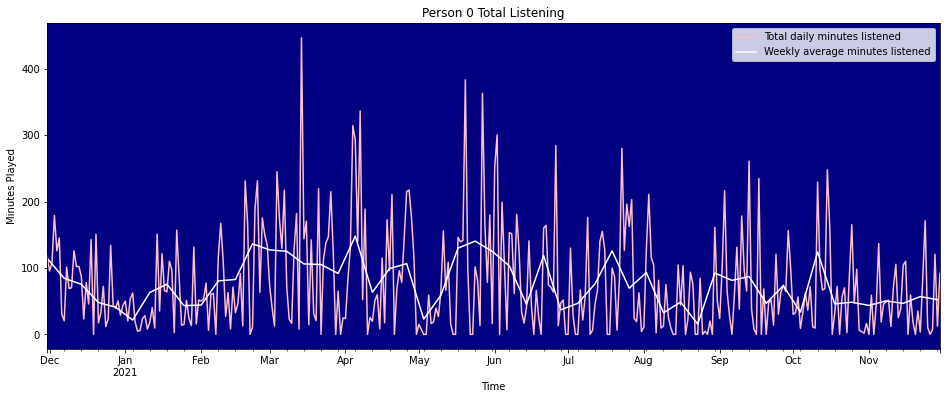

In [51]:
# Plot the daily total minutes listened for person 0
ax = total_listening_p0.plot(color='pink')

# Plot the weekly average minutes listened
total_listening_p0.resample('W').mean().fillna(0).plot(color='white',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 0 Total Listening')

Text(0.5, 1.0, 'Person 1 Total Listening')

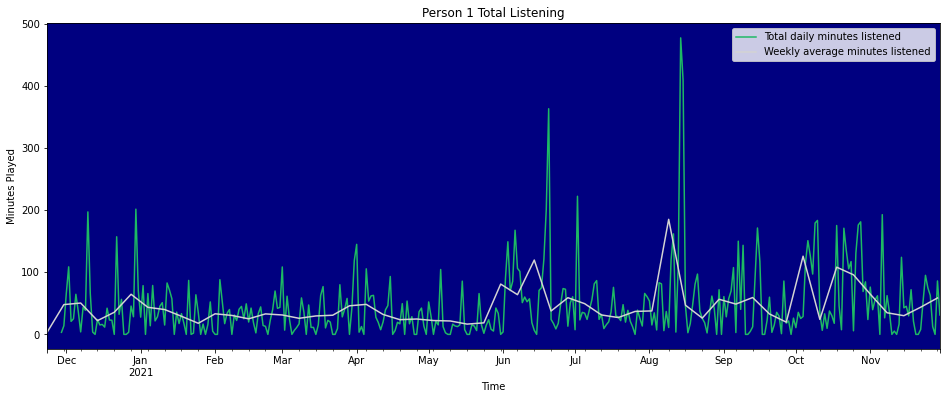

In [52]:
# Plot the daily total minutes listened for person 1
ax = total_listening_p1.plot(color='#1DB964')

# Plot the weekly average minutes listened
total_listening_p1.resample('W').mean().fillna(0).plot(color='lightgrey',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 1 Total Listening')

Text(0.5, 1.0, 'Person 2 Total Listening')

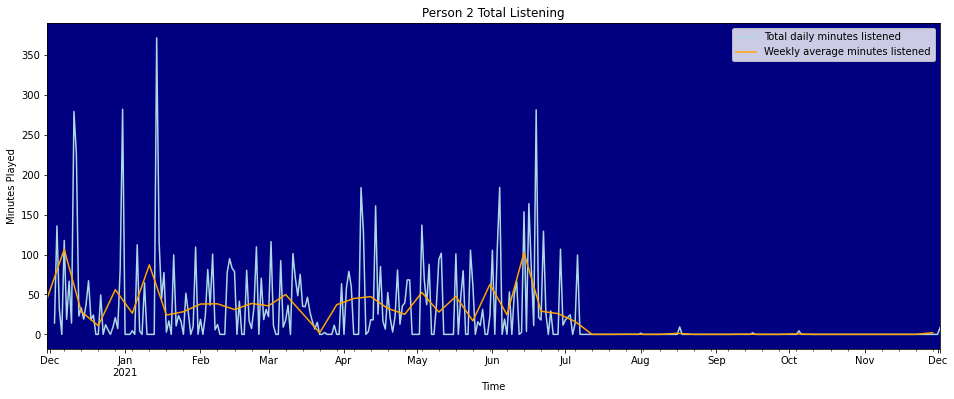

In [53]:
# Plot the daily total minutes listened for person 2
ax = total_listening_p2.plot(color='lightblue')

# Plot the weekly average minutes listened
total_listening_p2.resample('W').mean().fillna(0).plot(color='orange',ax=ax)

ax.legend(["Total daily minutes listened", "Weekly average minutes listened"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_xlabel('Time')
ax.set_title('Person 2 Total Listening')

In [ ]:
p2_listening_history.sort_values('minPlayed', ascending=False).drop_duplicates('trackName', keep='first')[:25]

In [ ]:
streaming_dataframes[0].resample('H')['msPlayed'].sum()

In [ ]:
streaming_dataframes[0].dtypes

In [ ]:
p0_listening_history['maxListen'] = p0_listening_history[['minPlayed']].max(axis=1)

In [ ]:
p0_listening_history = p0_listening_history[p0_listening_history['secPlayed']>60]

In [ ]:
p0_listening_history[p0_listening_history['secPlayed']>60]

In [ ]:
# Draw initial time series and make it transparent
ax = p1_listening_history[p1_listening_history['trackName']=='I Might Need Security'].resample('D')['minPlayed'].sum().plot(color='#1DB964', alpha=.9)
# Draw montly average values
p1_listening_history[p1_listening_history['trackName']=='drivers license'].resample('D')['minPlayed'].sum().plot(color='white', ax=ax)
# Draw roling average that takes into account 25 points
#p1_listening_history.resample('D')['minPlayed'].sum().plot(color='orange', ax=ax)
p1_listening_history[p1_listening_history['trackName']=='From Time'].resample('D')['minPlayed'].sum().plot(color='orange', alpha=.5, ax=ax)
## olive.rolling(25).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["'I Might Need Security' Daily Minutes Played", "'drivers license - Olivia Rodrigo'", "'From Time - Drake' Daily Minutes Played"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_title('Total Daily Minutes Played for Top 5 Tracks')
plt.show()

In [ ]:
daily_mins = p0_listening_history.resample('H')['minPlayed'].mean().fillna(0)

In [ ]:
ax = p0_listening_history.resample('H')['minPlayed'].sum().plot(color='#1DB964', alpha=.9)

daily_mins.rolling(10).sum().plot(ax=ax, color='white')

ax.set_ylabel('Minutes Played')
ax.set_title('Total Daily Minutes Played for Top 5 Tracks')
plt.show()

In [ ]:
(ax = 

In [ ]:
p0_listening_history.head(10)

In [ ]:
max_listens = p0_listening_history.sort_values('minPlayed', ascending=False).drop_duplicates('trackName', keep='first')

max_listens['maxListen'] = max_listens['minPlayed']

In [ ]:
max_listens

In [ ]:
p0_listening_history.merge(max_listens, how='left', left_on='trackName')

p0_listening_history.head()

In [ ]:
new = pd.merge(p0_listening_history,max_listens[['artistName','trackName','maxListen']], how='left')

In [ ]:
# df.loc[(df["B"] > 50) & (df["C"] == 900), "A"] *= 1000
print('Number of listens less than max:\t',len(new.loc[(new['trackName']=='From Time') & (new['minPlayed']!=new['maxListen'])]),'\nNumber of listens equal to max:\t',len(new.loc[(new['trackName']=='From Time') & (new['minPlayed']==new['maxListen'])]),'\nTotal listens:\n',len(new.loc[(new['trackName']=='From Time')]))

In [ ]:
new[new['trackName']=='From Time']

In [ ]:
p0_listening_history

In [ ]:
top_song_test = p0_listening_history.groupby(by=['trackName','artistName'])['minPlayed'].sum().sort_values(ascending=False)[:100]

In [ ]:
top_song_test

In [ ]:
top_song_test

In [ ]:
p0_listening_history['minPlayed'].sort_values(ascending=False)[:20]

In [ ]:
type(top_song_test)

In [ ]:
p0_listening_history 

In [ ]:

p1_listening_history1 = pd.read_json('person1_0.json')

p1_listening_history2 = pd.read_json('person1_1.json')

In [ ]:
p1_listening_history1

In [ ]:
p1_listening_history2

In [ ]:
# Concatenate listening history dataframes into single dataframe for analysis
p1_listening_history = pd.concat([p1_listening_history1, p1_listening_history2])

print(f'The length of the first dataframe:\t{len(p1_listening_history1)}\nThe length of the second dataframe:\t{len(p1_listening_history2)}\n\tLength of new dataframe:\t{len(p1_listening_history)}')

In [ ]:
len(p1_listening_history)

In [ ]:
p1_listening_history.head(5)

In [ ]:
p1_listening_history.tail(5)

In [ ]:
'''
  This function will transform a dataframe into time indexed df:

  1. Convert 'endTime' column into datetime datatype
  2. Set dataframe index to datetime column

'''

def make_time_indexed(df_to_transform, date_col):
  # Convert endTime column to datetime datatype
  df_to_transform[f'{date_col}'] = pd.to_datetime(df_to_transform[f'{date_col}'])

  # Set the index of dataframe to the datetime column for time series use
  df_to_transform.set_index(f'{endTime}', inplace = True)
  
  return df_to_transform



In [ ]:
make_time_indexed(p1_listening_history,'endTime')

In [ ]:
p1_listening_history

In [ ]:
p1_listening_history.dtypes

In [ ]:
'''
  Function to 
'''

In [ ]:
len(p1_listening_history[p1_listening_history['artistName']=='Call Her Daddy']) + len(p1_listening_history[p1_listening_history['artistName']=='The Daily'])
#len(test_removing_pods)

In [ ]:
p2_listening_history['minPlayed'].sort_values(ascending=False)[:10]

In [ ]:
test_removing_pods = p1_listening_history[~p1_listening_history['artistName'].isin(['Call Her Daddy','The Daily'])]

print(len(p1_listening_history), len(test_removing_pods))

In [ ]:
pods = p1_listening_history[p1_listening_history['artistName'].isin(['Call Her Daddy','The Daily'])]

pods.sort_values(by='minPlayed', ascending=False)

In [ ]:
test_removing_pods

In [ ]:
test_removing_pods['minPlayed'].resample('H').sum().plot()

In [ ]:
test_removing_pods['minPlayed'].describe()

In [ ]:
p1_total_listening = p1_listening_history['minPlayed']

In [ ]:
p1_total_listening

In [ ]:
p1_total_min_listening_hrs = p1_listening_history.resample('H')['minPlayed'].sum()

p1_total_listening

In [ ]:
p1_total_listening.describe()

In [ ]:
p1_total_listening.plot()

In [ ]:
p1_total_listening.query (p1_total_listening.max())

In [ ]:
p1_listening_history = p1_listening_history.fillna(0)


In [ ]:
p1_listening_history.head(20)

In [ ]:
p1_listening_history.artistName.value_counts()

In [ ]:
p1_listening_history.trackName.value_counts()[:20]

In [ ]:
test = p1_listening_history.trackName.value_counts()[:15]

test.plot(kind='barh')

for x,y in test.items():
  print(f'name:{x}, {y}')

In [ ]:
# Show total minutes listened
print(f'Total minutes played:\t{p1_listening_history.minPlayed.sum()}')

In [ ]:
top = p1_listening_history[p1_listening_history['trackName']=='I Might Need Security']
top

In [ ]:
top_play = top['minPlayed']

top_play.plot()

In [ ]:
len(top[top['minPlayed'] > 4])

In [ ]:
top[top['minPlayed'] < 4]

In [ ]:
# Draw initial time series and make it transparent
ax = p1_listening_history[p1_listening_history['trackName']=='I Might Need Security'].resample('D')['minPlayed'].sum().plot(color='#1DB964', alpha=.9)
# Draw montly average values
p1_listening_history[p1_listening_history['trackName']=='drivers license'].resample('D')['minPlayed'].sum().plot(color='white', ax=ax)
# Draw roling average that takes into account 25 points
#p1_listening_history.resample('D')['minPlayed'].sum().plot(color='orange', ax=ax)
p1_listening_history[p1_listening_history['trackName']=='From Time'].resample('D')['minPlayed'].sum().plot(color='orange', alpha=.5, ax=ax)
## olive.rolling(25).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["'I Might Need Security' Daily Minutes Played", "'drivers license - Olivia Rodrigo'", "'From Time - Drake' Daily Minutes Played"], facecolor='white')
ax.set_ylabel('Minutes Played')
ax.set_title('Total Daily Minutes Played for Top 5 Tracks')
plt.show()

In [ ]:
topsongplay = p1_listening_history[p1_listening_history['trackName']=='I Might Need Security'].resample('D')['minPlayed'].sum().plot(color='#1DB964')

topsongplay

In [ ]:
drivers = p1_listening_history[p1_listening_history['trackName']=='drivers license'].resample('D')['minPlayed'].sum().plot()

drivers

In [ ]:
# Draw initial time series and make it transparent
ax = topsongplay
# Draw montly average values
drivers.plot(ax=ax)
# Draw roling average that takes into account 25 points
## olive.rolling(25).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["daily data", "montly average"])
plt.show()

In [ ]:
p1_listening_history['artistName'].count()

In [ ]:
olive = p1_listening_history[p1_listening_history['artistName'] == 'Olivia Rodrigo']

In [ ]:
len(olive)

In [ ]:
olive

In [ ]:
olive_minplayed.reset_index().plot.scatter(x = 'endTime', y = 'minPlayed')

In [ ]:
olive_minplayed = olive['minPlayed']

olive_minplayed.fillna(value=0)

olive_minplayed

In [ ]:
olive_minplayed.plot()

plt.show()

In [ ]:
olive_minplayed.resample('W').mean().head(10)

In [ ]:
olive_minplayed.head()

In [ ]:
olive_minplayed.resample('M').sum().plot()

In [ ]:
olive_minplayed['2021-04':'2021-06'].resample('D').sum().plot()

In [ ]:
p1_listening_history['2021-02'].resample('D')['minPlayed'].sum().plot()

In [ ]:
feb_listening_history = p1_listening_history['2021-02']

In [ ]:
feb_listening_history.groupby(by='trackName')['minPlayed'].mean().sort_values()[-20:].plot(kind='barh')

In [ ]:
feb_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values()[-20:].plot(kind='barh')

In [ ]:
# Draw initial time series and make it transparent
ax = olive_minplayed.resample('D').sum().plot(alpha=0.25)
# Draw montly average values
olive_minplayed.resample('M').mean().plot(ax=ax)
# Draw roling average that takes into account 25 points
## olive.rolling(25).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["daily data", "montly average"])
plt.show()

In [ ]:
p1_listening_history.pivot_table(index='artistName', )

In [ ]:
pivot = pd.pivot_table(p1_listening_history, values='msPlayed', aggfunc = 'sum', index='trackName')

In [ ]:
pivot

In [ ]:
p1_listening_history.sort_values(by='msPlayed', ascending=False)

In [ ]:
print(p1_listening_history.groupby(by='trackName'))

In [ ]:
p1_listening_history[p1_listening_history['trackName']=='From Time']

In [ ]:
track_playcount = p1_listening_history.groupby(by='artistName')['trackName'].count().sort_values(ascending=True)[-10:]

In [ ]:
artist_timeplayed = p1_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:15]

artist_timeplayed

In [ ]:
track_timeplayed = p1_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:25]

track_timeplayed

In [ ]:
blackbear_df = p1_listening_history[p1_listening_history['artistName']=='blackbear']

# Total time listening to blackbear
blackbear_df.minPlayed.sum()

In [ ]:
blackbear_df.groupby(by='trackName')['minPlayed'].sum().sort_values()[-5:]

In [ ]:
blackbear_df.groupby(by='trackName')['minPlayed'].sum().sort_values()[-5:].plot(kind='barh')

In [ ]:
do_play = blackbear_df[blackbear_df['trackName']=='do re mi']['minPlayed']

do_play

In [ ]:
blackbear_df[blackbear_df['trackName']=='do re mi']['minPlayed'].plot()

In [ ]:
songs = '''From Time                                                                                               245.844300
I Might Need Security                                                                                   224.705183
Got Me (with Ari Lennox & Omen feat. Ty Dolla $ign & Dreezy)                                            196.199050
Made Love First                                                                                         183.744533
Relaxing Sleep Music • Deep Sleeping Music, Relaxing Music, Stress Relief, Meditation Music (Flying)    180.483133
Heaven                                                                                                  176.047683
Josslyn                                                                                                 175.589317
Missed Calls                                                                                            159.818333
Bitter (feat. Trevor Daniel)                                                                            159.328333
Still Be Friends (feat. Tory Lanez & Tyga)                                                              158.862683
Love Lockdown                                                                                           147.644250
FUCKING YOUNG / PERFECT (feat. Charlie Wilson, Chaz Bundick, Sydney Bennett & Kali Uchis)               147.153533
Don't Watch Me Cry                                                                                      146.042017
Hallelujah                                                                                              145.841250
RPG (feat. 6lack)                                                                                       144.925250
Slow Jamz                                                                                               138.980950
do re mi                                                                                                136.358450
The Question                                                                                            135.413633
Footsteps (feat. Musiq Soulchild)                                                                       133.230900
good 4 u  '''

f, (ax1, ax2) = plt.subplots(1,2, shareX=True, shareY=True, figsize=(10,10))
ax1.plot(p1_listening_history[p1_listening_history['trackName']=='From Time']['minPlayed'])
ax1.set_title("'From Time' minutes played")
ax2.plot(top_play)
ax2.set_title("'I Might Need Security' minutes played")
l='''ax3.plot(p1_listening_history[p1_listening_history['trackName']=='Got Me (with Ari Lennox & Omen feat. Ty Dolla $ign & Dreezy)']['minPlayed'])
ax3.set_title("'Got Me' minutes played")
ax4.plot(p1_listening_history[p1_listening_history['trackName']=='Made Love First']['minPlayed'])
ax4.set_title("'Made Love First' minutes played")
ax5.plot(p1_listening_history[p1_listening_history['trackName']=='Made Love First']['minPlayed'])
ax5.set_title("'Made Love First' minutes played")
ax6.plot(p1_listening_history[p1_listening_history['trackName']=='Heaven']['minPlayed'])
ax6.set_title("'Heaven' minutes played")
ax7.plot(p1_listening_history[p1_listening_history['trackName']=='Josslyn']['minPlayed'])
ax7.set_title("'Josslyn")
ax8.plot(p1_listening_history[p1_listening_history['trackName']=='Missed Calls']['minPlayed'])
ax8.set_title("'Missed Calls'")
#ax9.plot(p1_listening_history[p1_listening_history['trackName']=='Bitter (feat. Trevor Daniel)']['minPlayed'])
#ax9.set_title("'Bitter (feat. Trevor Daniel)' minutes played")
#ax10.plot(p1_listening_history[p1_listening_history['trackName']=='Still Be Friends (feat. Tory Lanez & Tyga) ']['minPlayed'])
#ax10.set_title("'Still Be Friends (feat. Tory Lanez & Tyga) ' minutes played")
ax11.plot(p1_listening_history[p1_listening_history['trackName']=='Love Lockdown']['minPlayed'])
ax11.set_title("'Love Lockdown' minutes played")
ax12.plot(p1_listening_history[p1_listening_history['trackName']=='FUCKING YOUNG / PERFECT (feat. Charlie Wilson, Chaz Bundick, Sydney Bennett & Kali Uchis)']['minPlayed'])
ax12.set_title("'FUCKING YOUNG / PERFECT' minutes played")
ax13.plot(p1_listening_history[p1_listening_history['trackName']=="Don't Watch Me Cry"]['minPlayed'])
ax13.set_title("'Don't Watch Me Cry' minutes played")
ax14.plot(p1_listening_history[p1_listening_history['trackName']=='Hallelujah']['minPlayed'])
ax14.set_title("'Hallelujah' minutes played")
ax15.plot(p1_listening_history[p1_listening_history['trackName']=='RPG (feat. 6lack)']['minPlayed'])
ax15.set_title("'RPG (feat. 6lack)' minutes played")
ax16.plot(p1_listening_history[p1_listening_history['trackName']=='Slow Jamz']['minPlayed'])
ax16.set_title("'Slow Jamz' minutes played")
ax17.plot(do_play)
ax17.set_title("'do re mi' minutes played")
ax18.plot(p1_listening_history[p1_listening_history['trackName']=='The Question']['minPlayed'])
ax18.set_title("'The Question' minutes played")
ax19.plot(p1_listening_history[p1_listening_history['trackName']=='Footsteps (feat. Musiq Soulchild)']['minPlayed'])
ax19.set_title("'Footsteps (feat. Musiq Soulchild)' minutes played")
ax20.plot(p1_listening_history[p1_listening_history['trackName']=='good 4 u']['minPlayed'])
ax20.set_title("'good 4 u' minutes played")'''


In [ ]:
songs = '''I Might Need Security                                67
Missed Calls                                                    60
Made Love First                                                 59
Bitter (feat. Trevor Daniel)                                    58
Josslyn                                                         58
Purple Lamborghini (with Rick Ross)                             58
Don't Watch Me Cry                                              57
Blueberry Faygo                                                 57
ROCKSTAR (feat. Roddy Ricch)                                    56
Got Me (with Ari Lennox & Omen feat. Ty Dolla $ign & Dreezy)    53
Still Be Friends (feat. Tory Lanez & Tyga)                      53
Heaven                                                          52
Juicy                                                           52
From Time                                                       50
good 4 u                                                        49'''

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'navy'

In [ ]:
track_playcount_bar = track_playcount.plot(kind='barh', color='#1DB964')

track_playcount_bar

In [ ]:
artist_timeplayed.sort_values().plot(kind='barh', color='#1DB964')

In [ ]:
track_timeplayed = p1_listening_history.groupby(by='trackName')['msPlayed'].sum().sort_values(ascending=False)[:15]

track_plays_bar = track_plays.plot(kind='barh', color='#1DB964')

track_plays_bar

In [ ]:
p1_listening_history[p1_listening_history['artistName']=='blackbear'].minPlayed.sum()

In [ ]:
p1_listening_history[p1_listening_history['trackName']=='good 4 u'].minPlayed.sum()

In [ ]:
p1_listening_history[p1_listening_history['trackName']=='I Might Need Security'].minPlayed.sum()

In [ ]:
track_timeplayed = p1_listening_history.groupby(by='trackName')['minPlayed'].sum().sort_values(ascending=False)[:15]

In [ ]:
track_timeplayed.plot(kind='barh')

In [ ]:
olive.groupby(by='trackName')['msPlayed'].sum().sort_values(ascending=False)[:15]

* Add 'start time' to dataframe by subtracting msPlayed from 'endtime'
* Add columns for minPlayed, secPlayed, timesPlayed
* Change 'startTime' and 'endTime' to datetime datatypes

Need Spotify API
* Add 'contentType' (track, podcast etc.) column
* Add audio features columns


In [ ]:
p1_listening_history['endTime'] = pd.to_datetime(p1_listening_history['endTime'])

In [ ]:
p1_listening_history.dtypes

In [ ]:
p1_listening_history.head(2)

In [ ]:
p1_listening_history['secPlayed'] = pd.Timestamp(p1_listening_history['secPlayed'], unit='s')

In [ ]:
p1_listening_history[['minPlayed','secPlayed']] = pd.to_datetime(p1_listening_history[['minPlayed','secPlayed']])

In [ ]:
p1_listening_history['startTime'] = p1_listening_history['endTime'] - p1_listening_history['minPlayed']

Progress notes:    
- blackbear df 
- found number of plays for top song 'I might' to be when listened to whole song
  - need to check if this applies to all songs

- plotted top 20 total minutes played

# World Map Visualization of Top Song Artists' Origin (Ready to run)

In [54]:
# Import the beautifulsoup 
# and request libraries of python.
import requests
import bs4
import regex as re

In [9]:
# Import folium for map and marker
import folium

In [13]:
# Import simplemaps world csv into dataframe
# df contains information for cities around the world, including lat/long for mapping
world_cities = pd.read_csv('/content/spotify-vision/simplemaps_world_cities/worldcities.csv')

world_cities.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
world_cities[world_cities['city'] == 'Thousand Oaks']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2681,Thousand Oaks,Thousand Oaks,34.1914,-118.8755,United States,US,USA,California,NaN,215029.0,1840021844


In [14]:

# Dictionary of artist birthplace lat/long of top songs for mappinng
locations_artist = {'artist': ['Drake','Jorja Smith','Olivia O\'Brien', 'blackbear','Kanye West', 'Drake', 'Porter Robinson', 'Young Thug', 'DaBaby', 'YNW Melly', 'Cage The Elephant', 'Lost Frequencies', 'Vampire Weekend', 'Nora En Pure', 'Bo Burnham'],
                    'person': [0, 0, 0, 0, 0, 1,1,1,1,1,2,2,2,2,2 ]}

location_df = pd.DataFrame.from_dict(locations_artist)

In [15]:
location_df

,artist,person
0,Drake,0
1,Jorja Smith,0
2,Olivia O'Brien,0
3,blackbear,0
4,Kanye West,0
5,Drake,1
6,Porter Robinson,1
7,Young Thug,1
8,DaBaby,1
9,YNW Melly,1


In [16]:
def get_artist_location(artist_name):
  # Make two strings with default google search URL
  # 'https://google.com/search?q=' and
  # our customized search keyword.
  # Concatenate them
  text = f'{artist_name} artist'

  url = 'https://google.com/search?q=' + text
      
    # Fetch the URL data using requests.get(url),
    # store it in a variable, request_result.
  request_result=requests.get( url )
      
    # Creating soup from the fetched request
  soup = bs4.BeautifulSoup(request_result.text,
                            "html.parser")

    # Finding span of specific class that contains Wiki information for birth place identifying 
  origin = soup.find_all("span" , class_="XLloXe AP7Wnd")

  # Find pattern of 'City, State(or Country)'
  location_pattern = re.compile(r'(([A-Z][a-z]*\s*)+)\s*,\s*([A-Z][a-z]*)')

  # For each text in list of span, convert tags to text and search pattern. If search is not none, return City group of pattern
  for text in origin:
    text = text.text
    location = re.search(location_pattern,text)
    if location is not None:
      return location.group(1)
    

In [22]:
# 
locations = []
for index, row in location_df.iterrows():
  artist_location = get_artist_location(row['artist']) 
  print(artist_location)
  locations.append(artist_location)
print(locations)

Toronto
Walsall
Thousand Oaks
Daytona Beach
Atlanta
Toronto
Atlanta
Sylvan Hills
None
Gifford
Bowling Green
Brussels
New York
Johannesburg
Hamilton
['Toronto', 'Walsall', 'Thousand Oaks', 'Daytona Beach', 'Atlanta', 'Toronto', 'Atlanta', 'Sylvan Hills', None, 'Gifford', 'Bowling Green', 'Brussels', 'New York', 'Johannesburg', 'Hamilton']


In [12]:
location_df['city'] = locations

In [13]:
artist_locations = location_df.merge(world_cities, how='left', on='city')

In [14]:
artist_locations.dropna(subset=['lat','lng'], inplace=True)

artist_locations

,artist,person,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Drake,0,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
1,Jorja Smith,0,Walsall,Walsall,52.5800,-1.9800,United Kingdom,GB,GBR,Walsall,NaN,67594.0,1.826656e+09
2,Olivia O'Brien,0,Thousand Oaks,Thousand Oaks,34.1914,-118.8755,United States,US,USA,California,NaN,215029.0,1.840022e+09
3,blackbear,0,Daytona Beach,Daytona Beach,29.1994,-81.0982,United States,US,USA,Florida,NaN,69186.0,1.840015e+09
4,Kanye West,0,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
5,Kanye West,0,Atlanta,Atlanta,33.1136,-94.1672,United States,US,USA,Texas,NaN,5526.0,1.840019e+09
6,Drake,1,Toronto,Toronto,43.7417,-79.3733,Canada,CA,CAN,Ontario,NaN,5429524.0,1.124280e+09
7,Porter Robinson,1,Atlanta,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,admin,5449398.0,1.840014e+09
8,Porter Robinson,1,Atlanta,Atlanta,33.1136,-94.1672,United States,US,USA,Texas,NaN,5526.0,1.840019e+09
10,DaBaby,1,Cleveland,Cleveland,41.4767,-81.6804,United States,US,USA,Ohio,NaN,1710093.0,1.840001e+09


In [15]:
map = folium.Map(location=[artist_locations['lat'].mean(), 
                           artist_locations["lng"].mean()], 
                 zoom_start=3, control_scale=True)

folium.TileLayer('stamentoner').add_to(map)

for index, location_info in artist_locations.iterrows():
  if location_info.person == 0:
    type_color = 'blue'
  elif location_info.person == 1:
    type_color = 'pink'
  else:
    type_color = 'lightgreen'
  folium.Marker([location_info["lat"], location_info["lng"]], popup=f'City,County:\t{location_info["city"]},{location_info["country"]}\nArtist: {location_info["artist"]}', icon=folium.Icon(color=f'{type_color}')).add_to(map)

map

In [ ]:
text = 'olivia o\'brien artist'

url = 'https://google.com/search?q=' + text
    
  # Fetch the URL data using requests.get(url),
  # store it in a variable, request_result.
request_result=requests.get( url )
    
  # Creating soup from the fetched request
soup = bs4.BeautifulSoup(request_result.text,
                          "html.parser")

  # Finding temperature in Celsius.
  # The temperature is stored inside the class "BNeawe". 
origin = soup.find_all("span" , class_="XLloXe AP7Wnd")

location_pattern = re.compile(r'(([A-Z][a-z]*\s*)+)\s*,\s*([A-Z][a-z]*)')
  #city = origin.split(sep=',')[0]

for text in origin:
  text = text.text
  location = re.search(location_pattern,text)
  if location is not None:
    print(location.group())

In [ ]:
()

In [ ]:
get_artist_location('olivia o\'brien') 

In [ ]:
get_artist_location('blackbear') 

In [ ]:
location_pd

# Spotify API Setup * Exploratory purposes only *

In [23]:
!pip install spotipy --upgrade

In [24]:
!pip install colab-env --upgrade

In [25]:
import colab_env

In [26]:
import os

# Get environment variables for Spotipy API access
CLIENT_ID = os.getenv("SPOTIPY_CLIENT_ID")
SECRET_ID = os.getenv("SPOTIPY_CLIENT_SECRET")

In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()

sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
def 

In [6]:
results = sp.search('artist:Drake', limit=1)

In [ ]:
hi = sp.search('I Might Need Security', limit=1)

In [28]:
audio_F = sp.audio_features(tracks=['3EApebexZ7YqDIqw2EMTDh'])

duration, dance, speechiness, valence = audio_F[0]['duration_ms'], audio_F[0]['danceability'], audio_F[0]['speechiness'], audio_F[0]['valence']

print(duration, dance, speechiness, valence)

240640 0.514 0.408 0.287


In [ ]:
hi

In [ ]:
hi['tracks']['items'][0]['duration_ms']

In [ ]:
(results['tracks']['items'][0]['album']['artists'][0]['id']

In [ ]:
sp.artist('1anyVhU62p31KFi8MEzkbf')

# P2 Listening History * Exploratory purposes only *

In [ ]:
p2_listening_history1, p2_listening_history2, p2_listening_history3 = pd.read_json('StreamingHistory0.json'), pd.read_json('StreamingHistory1.json'), pd.read_json('StreamingHistory2.json')

p2_listening_history1

In [ ]:
p2_listening_history2

In [ ]:
p2_listening_history3

In [ ]:
# Concatenate listening history dataframes into single dataframe for analysis
p2_listening_history = pd.concat([p2_listening_history1, p2_listening_history2, p2_listening_history3])

print(f'The length of the first dataframe:\t{len(p2_listening_history1)}\nThe length of the second dataframe:\t{len(p2_listening_history2)}\nThe length of the third dataframe:\t{len(p2_listening_history3)}\n\tLength of new dataframe:\t{len(p2_listening_history)}')

In [ ]:
p2_listening_history.dtypes

In [ ]:
# Change endtime to datetime datatype
p2_listening_history['endTime'] = pd.to_datetime(p2_listening_history['endTime'])

# Set index of dataframe to datetime column
p2_listening_history.set_index('endTime', inplace=True)

In [ ]:
# Add columns for seconds and minutes played
p2_listening_history['secPlayed'], p2_listening_history['minPlayed'] = p2_listening_history['msPlayed'] / (1000), p2_listening_history['msPlayed'] / (60*1000)

p2_listening_history

In [ ]:
p2_listening_history.dtypes

In [ ]:
p2_listening_history.trackName.value_counts()

In [ ]:
p2_listening_history['minPlayed'].min()

In [ ]:
p2_listening_history.groupby(by=['trackName','artistName','minPlayed'])['minPlayed'].sum().sort_values(ascending=False)[:20]

In [ ]:
p2_listening_history.groupby(by='artistName')['minPlayed'].sum().sort_values(ascending=False)[:10]

In [ ]:
top_song = p2_listening_history[p2_listening_history['trackName']== "Take Kare (feat. Lil Baby & Lil Durk)"].resample('W')['minPlayed']

top_song.plot()

In [ ]:
p2_listening_history[p2_listening_history['trackName']== "What’s Next"].resample('W')['minPlayed'].plot()

In [ ]:
p2_listening_history[p2_listening_history['trackName']== "Take Kare (feat. Lil Baby & Lil Durk)"]

In [ ]:
p2_listening_history[p2_listening_history['trackName']== "Take Kare (feat. Lil Baby & Lil Durk)"]['minPlayed'].plot()

# P3 Listening History * Exploratory purposes only *

In [ ]:
# Import listening history
p3_history = pd.read_json('p2_listening history.json')

p3_history.head()

In [ ]:
p3_history['artistName'].value_counts()

In [ ]:
p3_history.dtypes

In [ ]:
p3_history['endTime'] = pd.to_datetime(p3_history['endTime'])

p3_history.set_index('endTime', inplace=True)

p3_history.head()

In [ ]:
p3_history['secPlayed'], p3_history['minPlayed'] = p3_history['msPlayed'] / 1000 , p3_history['msPlayed'] / (1000*60)

p3_history

In [ ]:
p3_history.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)[:10]

In [ ]:
p3_history['minPlayed'].sum()

In [ ]:
p3_vamp = p3_history[p3_history['artistName']=='Vampire Weekend'].resample('D')['minPlayed'].sum()

p3_vamp.plot(color='#1DB964')

In [ ]:
p3_top = p3_history[p3_history['artistName']=='Cage The Elephant']

p3_top

In [ ]:
ax = p3_history[p3_history['artistName']=='Lost Frequencies'].resample('D')['minPlayed'].sum().plot(color='#1DB964')

p3_top.resample('D')['minPlayed'].sum().plot(ax=ax, color='white')

p3_vamp.plot(ax=ax, color='orange')

ax.legend(['Lost Frequencies', 'Cage The Elephant', 'Vampire Weekend'], facecolor='white')
ax.set_ylabel('minutes listened per day')

In [ ]:
p3_history['minPlayed'].sum()

In [ ]:
len(p3_history)

In [ ]:
p3_history

In [ ]:
p3_total_listening = p3_history.resample('D').sum()

p3_total_listening

In [ ]:
p3_listening = p3_history.resample('D')

In [ ]:
p3_listening.head()

In [ ]:
p3_total_listening.plot(color='#1DB964')



# Discussion

- Would like to explore the skipping behavior
- 